In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
print(os.getcwd())

C:\Users\SHIVA


In [3]:
os.chdir("E:\\PROJECTS 2022\\kprit\\8. HOUSE PRICE PREDICTION USING REGRESSION ANALYSIS")
housing = pd.read_csv("Housing Dataset.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.columns#features or attributes or variables or labels or dependents and independents

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
housing.shape

(20640, 10)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
housing["total_bedrooms"]=housing.total_bedrooms.astype('str').transform(lambda x: x.replace('nan','280.0'))

In [9]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

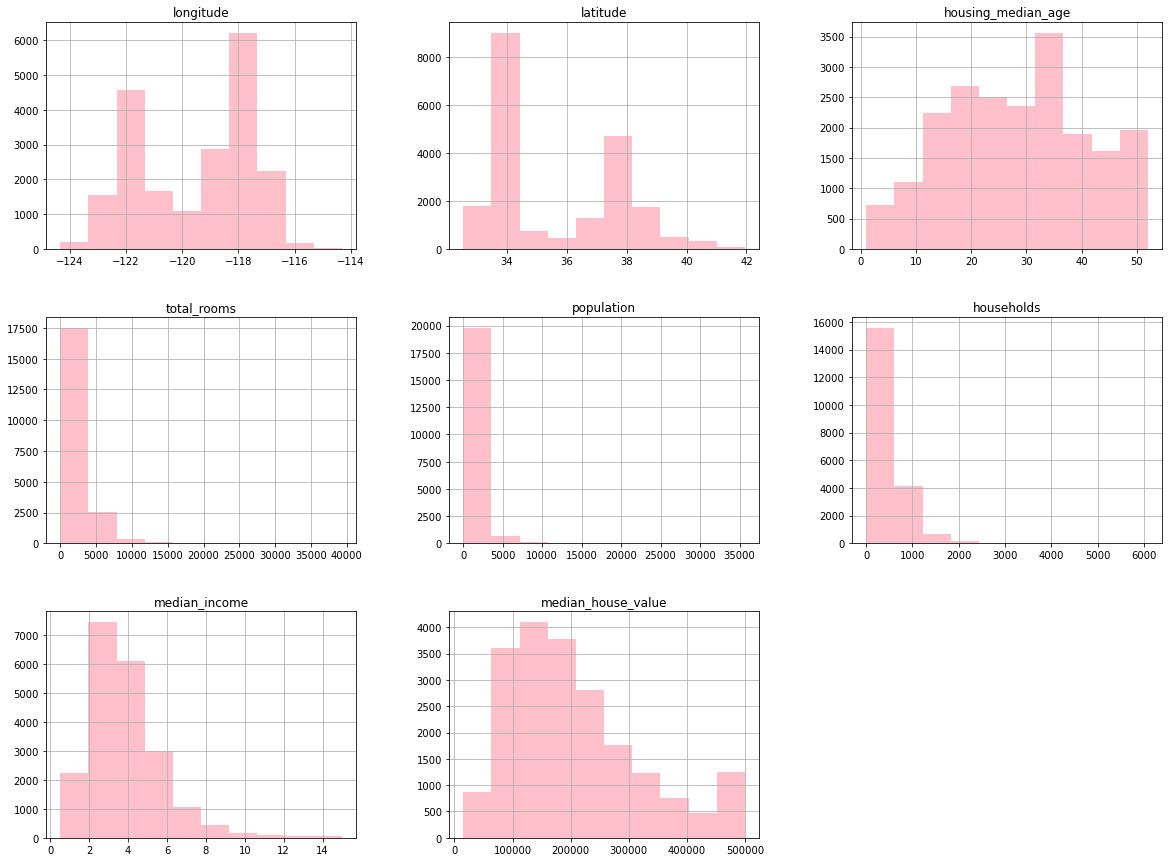

In [11]:
housing.hist(figsize=(20,15),color = 'pink')
plt.show()

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

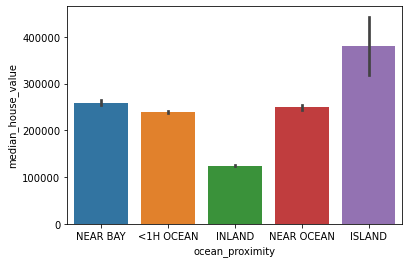

In [12]:
sns.barplot(data=housing,x='ocean_proximity',y='median_house_value')

No handles with labels found to put in legend.


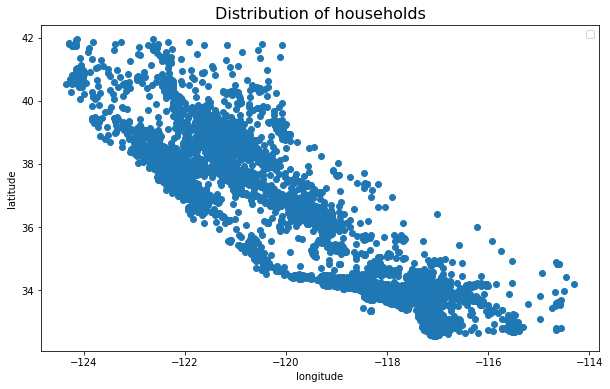

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(x=housing['longitude'],y=housing['latitude'])
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Distribution of households",size=16)
plt.legend()
plt.show()

No handles with labels found to put in legend.


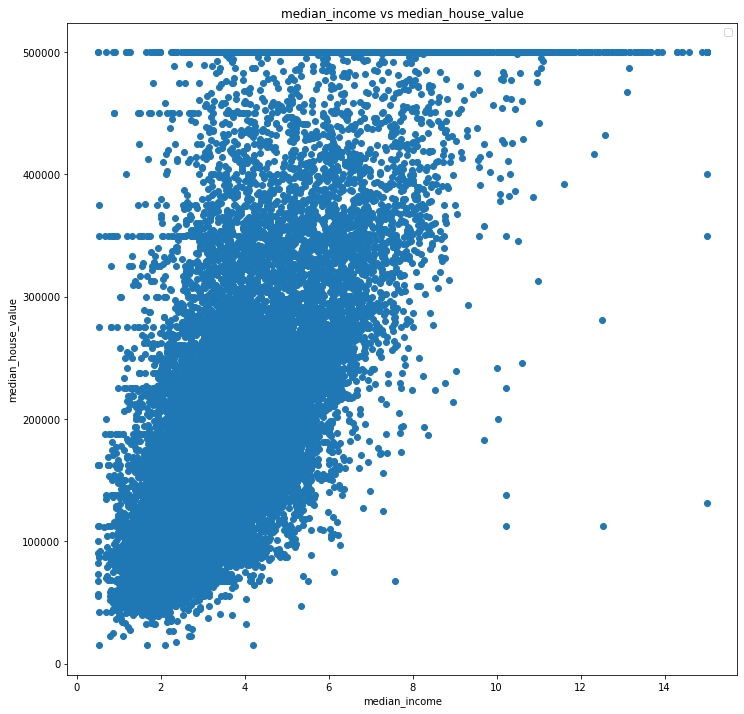

In [14]:
plt.figure(figsize=(12,12))
plt.scatter(housing.median_income,housing.median_house_value)
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.title("median_income vs median_house_value")
plt.legend()
plt.show()

<AxesSubplot:xlabel='median_house_value', ylabel='households'>

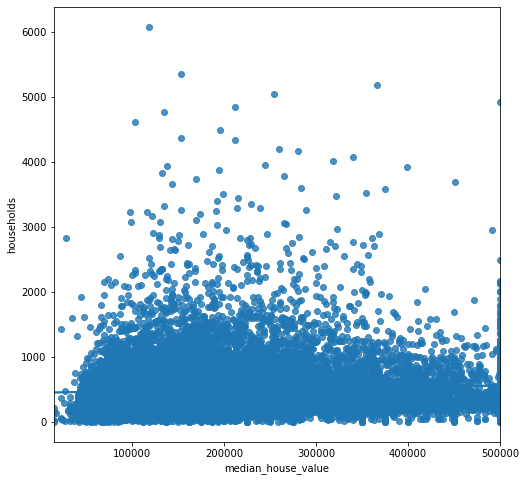

In [15]:
plt.figure(figsize=(8, 8))
sns.regplot(data=housing,x='median_house_value',y='households')

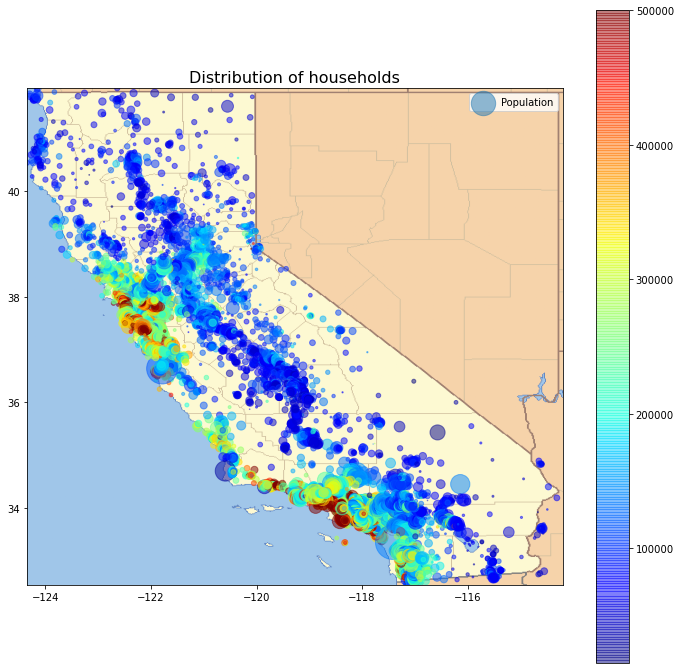

In [16]:
plt.figure(figsize=(12,12))
img=plt.imread('image.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=housing['longitude'],y=housing['latitude'],alpha=0.5,s=housing['population']/30,c=housing['median_house_value'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()

From above plot we can infer that,

1.Housing prices are much related to location and population density.

2.Housing prices near ocean are higher

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

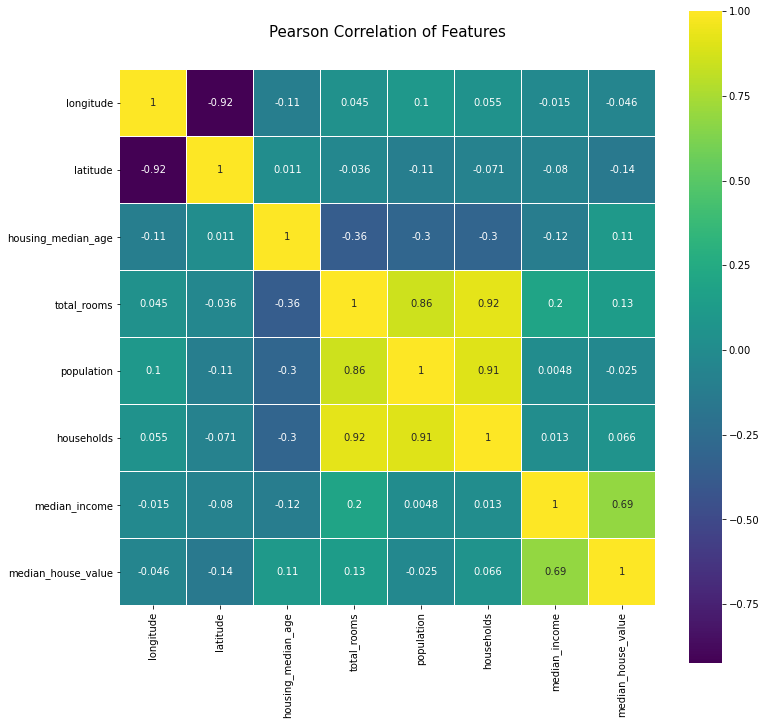

In [17]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(housing.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white',annot=True)

In [18]:
housing["ocean_proximity"]=housing.ocean_proximity.map({"<1H OCEAN": 0, "INLAND": 1,"NEAR OCEAN": 2,"NEAR BAY": 3,"ISLAND": 4})

C:\Users\SHIVA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

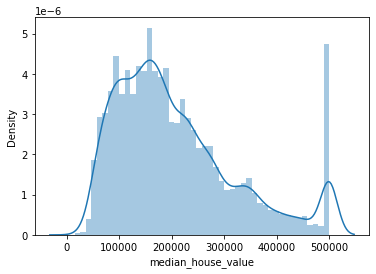

In [19]:
sns.distplot(housing["median_house_value"])

In [20]:
y=housing.median_house_value

In [21]:
y=np.log(y)

C:\Users\SHIVA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

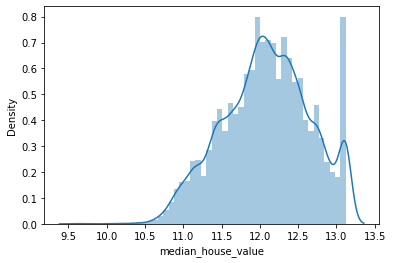

In [22]:
sns.distplot(y)

In [23]:
y=y.values

In [24]:
y

array([13.02276401, 12.78968394, 12.77167051, ..., 11.43279942,
       11.34687088, 11.40087596])

In [25]:
housing.drop(["median_house_value"],axis=1,inplace=True)

In [26]:
x=housing
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1


In [27]:
x=x.values
x

array([[-122.23, 37.88, 41.0, ..., 126.0, 8.3252, 3],
       [-122.22, 37.86, 21.0, ..., 1138.0, 8.3014, 3],
       [-122.24, 37.85, 52.0, ..., 177.0, 7.2574, 3],
       ...,
       [-121.22, 39.43, 17.0, ..., 433.0, 1.7, 1],
       [-121.32, 39.43, 18.0, ..., 349.0, 1.8672, 1],
       [-121.24, 39.37, 16.0, ..., 530.0, 2.3886, 1]], dtype=object)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x=scaler.fit_transform(x)

In [29]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.215,random_state=0)

# RANDOM FOREST REGRESSOR

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [31]:
rf_regressor = RandomForestRegressor(n_estimators=500,max_depth=11,min_samples_split=4,random_state = 0)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=11, min_samples_split=4, n_estimators=500,
                      random_state=0)

In [32]:
rf_regressor.score(x_train,y_train)

0.896056409736034

In [33]:
rf_regressor.score(x_test,y_test)

0.8164962225804322

In [34]:
# Predicting the values
y_pred = rf_regressor.predict(x_test)
list(y_pred)

[11.886220108653609,
 12.445464066388865,
 11.905284683941401,
 11.221165652400884,
 12.704191172315724,
 11.60140436034082,
 12.552315880623679,
 12.710196476099222,
 12.632615672577929,
 12.257043335870636,
 12.382653979844433,
 11.337437322102454,
 11.21491174119754,
 11.679786153438394,
 12.163966025183257,
 12.571886800347896,
 12.750534675342422,
 12.224819596643478,
 12.04575520136586,
 12.830109207533695,
 11.819092105281143,
 10.93784556754654,
 12.494778532415658,
 12.348986102051084,
 12.110473516805968,
 12.009738300348994,
 12.258505028722446,
 12.28026631161122,
 11.705885224412347,
 11.12089664304673,
 12.896957726186123,
 12.574535465120277,
 12.718348744238547,
 12.134875718200634,
 11.109017404411397,
 11.778732469900966,
 11.943320193557904,
 11.79150719781335,
 12.379498563282288,
 11.962732136769143,
 11.680762989373905,
 11.630171793515007,
 11.22089927132068,
 12.316485496675355,
 12.105023791266502,
 11.144435468580557,
 11.928698263816537,
 11.997695980057738,


In [35]:
y_test#actual values

array([11.82700601, 12.39379625, 12.20956653, ..., 12.21304826,
       12.92391244, 12.02154867])

In [36]:
from sklearn.metrics import mean_squared_error,r2_score
p = mean_squared_error(y_test, y_pred)
print(p ** 0.5)

0.24376014107283636


""" ROOT MEAN SQUARED ERROR(RMSE) VALUE USING -> Random Forest Regressor using 500 estimators = 0.24368305689760875 ""

In [37]:
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.metrics import mean_squared_error,r2_score

In [38]:
def plot_validation_curve(scores,param_range,param_name,scoring='r2'):
    """This function plot validation curve.
    
    Parameters:
        scores: scores obtained from validation_curve() method
        param_range: list of range of parameters passed as 'param_range' in validation_curve() method
        scoring: str
    """
    n=len(param_range)
    if scoring=='r2':
        train_score=[scores[0][i].mean() for i in range (0,n)]
        test_score=[scores[1][i].mean() for i in range (0,n)]
    elif scoring=='neg_mean_squared_error':
        train_score=[np.sqrt(-scores[0][i].mean()) for i in range (0,n)]
        test_score=[np.sqrt(-scores[1][i].mean()) for i in range (0,n)]

    fig=plt.figure(figsize=(8,6))
    plt.plot(param_range,train_score,label='Train')
    plt.plot(param_range,test_score,label='Test')
    plt.xticks=param_range
    plt.title("Validation curve of {}".format(param_name),size=12)
    plt.legend()

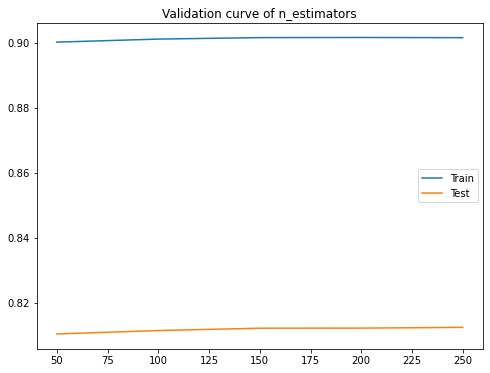

In [39]:
param_name='n_estimators'
param_range = range(50,251,50)
scoring='r2'
curve=validation_curve(rf_regressor,x_train,y_train,scoring=scoring,cv=5,param_name=param_name,
                        param_range=param_range,n_jobs=-1)
plot_validation_curve(curve,param_range,param_name,scoring)

# LINEAR REGRESSION ANALYSIS

In [40]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [41]:
model.fit(x_train, y_train)

LinearRegression()

In [42]:
model.score(x_train, y_train)

0.6444723619607453

In [43]:
model.score(x_test, y_test)

0.6394656223426367

In [44]:
# Predicting the values
y_pred = model.predict(x_test)

In [45]:
from sklearn.metrics import mean_squared_error,r2_score
p = mean_squared_error(y_test, y_pred)
print(p ** 0.5)

0.341675256542633


RANDOM FORESR HAS LESS ERROR WHILE COMPARED TO LINEAR REGRESSION AND HAVING GREAT ACCURACY SCORE 

# WORKING ON TEST DATA

In [57]:
testing = pd.read_csv('testing.csv')
testing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.27,38.29,20.0,3870.0,795.0,2088.0,774.0,3.3021,NEAR BAY
1,-122.26,38.28,24.0,2831.0,502.0,1462.0,503.0,4.5000,NEAR BAY
2,-122.27,38.28,37.0,1170.0,303.0,766.0,302.0,2.6618,NEAR BAY
3,-122.26,38.31,33.0,4518.0,704.0,1776.0,669.0,5.2444,NEAR BAY
4,-122.27,38.32,31.0,1267.0,319.0,545.0,297.0,1.9946,NEAR BAY


In [58]:
longitude_test = testing.longitude

In [59]:
latitude_test = testing.latitude

In [60]:
testing["total_bedrooms"]=testing.total_bedrooms.astype('str').transform(lambda x: x.replace('nan','280.0'))

In [61]:
testing["ocean_proximity"]=testing.ocean_proximity.map({"<1H OCEAN": 0, "INLAND": 1,"NEAR OCEAN": 2,"NEAR BAY": 3,"ISLAND": 4})

In [62]:
rf_regressor.predict(testing)

C:\Users\SHIVA\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([12.94908782, 12.95104817, 12.95954676, 12.95104817, 12.8806866 ,
       12.94606196, 12.95038673, 12.95242382, 12.96110755, 12.95038673,
       12.9617641 , 12.89345701, 12.95024336, 12.95423269, 12.95104817,
       12.95104817, 12.95104817, 12.95104817, 12.95104817, 12.95104817,
       12.95104817, 12.95104817, 12.95104817, 12.94685506, 12.95104817,
       12.95104817, 12.95104817, 12.95104817, 12.95104817, 12.95117815,
       12.95104817, 12.96179757, 12.94262412, 12.95001052, 12.95104817,
       12.95104817, 12.95104817, 12.95104817, 12.95104817, 12.95104817,
       12.95104817, 12.95104817, 12.88246927, 12.94606196, 12.95104817,
       12.9487112 , 12.95104817, 12.95104817, 12.95104817, 12.9487112 ,
       12.9487112 , 12.95244341, 12.9487112 , 12.9487112 , 12.93691286,
       12.9487112 , 12.9487112 , 12.9487112 , 12.9487112 , 12.95104817,
       12.9487112 , 12.95104817, 12.95104817, 12.95104817, 12.9487112 ,
       12.9487112 , 12.9487112 , 12.9487112 , 12.94804976, 12.94

In [64]:
submission_predict=rf_regressor.predict(testing)

C:\Users\SHIVA\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [66]:
submission=pd.DataFrame(data = {'longitude':longitude_test,'latitude':latitude_test,'house_price':submission_predict})

In [67]:
submission.to_csv('Sample_Submission.csv',index = False)

In [68]:
test_results = pd.read_csv('Sample_Submission.csv')
test_results

,longitude,latitude,house_price
0,-122.27,38.29,12.949088
1,-122.26,38.28,12.951048
2,-122.27,38.28,12.959547
3,-122.26,38.31,12.951048
4,-122.27,38.32,12.880687
...,...,...,...
95,-121.03,39.14,12.948711
96,-121.07,39.13,12.948711
97,-121.05,39.11,12.948711
98,-121.04,39.08,12.948050
